<a href="https://colab.research.google.com/github/tanvi2419/INF05731_assignment1/blob/main/Tanvi_Kandula_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
import csv

def extract_review_texts_from_csv(csv_input_file_path):
    """
    Reads the CSV file and returns the content as a list of review texts.
    """
    extracted_review_texts = []
    with open(csv_input_file_path, 'r', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            extracted_review_texts.append(row[1])  # Assuming review text is in the second column
    return extracted_review_texts


def generate_ngrams_from_text(text, n):
    """
    Generates n-grams from the given text.
    """
    text_words = text.split()  # Split the text into individual words
    generated_ngrams = []
    for i in range(len(text_words) - n + 1):
        generated_ngrams.append(' '.join(text_words[i:i+n]))
    return generated_ngrams


def count_ngrams_in_reviews(review_texts, n):
    """
    Counts the frequency of all the N-grams (N = n) in the review texts.
    """
    ngram_counts = {}
    for review_text in review_texts:
        print("Review Text:", review_text)  # Print the review text
        review_ngrams = generate_ngrams_from_text(review_text, n)
        print("N-grams:", review_ngrams)  # Print the generated n-grams
        for ngram in review_ngrams:
            if ngram in ngram_counts:
                ngram_counts[ngram] += 1
            else:
                ngram_counts[ngram] = 1
    return ngram_counts


def main():
    # Change the input file path to the correct file path in Google Colab
    csv_input_file_path = '/content/sample_data/scrapped.csv'
    # Read the CSV file and extract review texts
    review_texts = extract_review_texts_from_csv(csv_input_file_path)
    # Set the value of N for N-grams
    n = 3
    # Count the frequency of all the N-grams in the review texts
    ngram_counts = count_ngrams_in_reviews(review_texts, n)
    # Print the results
    print(f"Frequency of {n}-grams:")
    for ngram, count in ngram_counts.items():
        print(f"{ngram}: {count}")

if __name__ == "__main__":
    main()



Streaming output truncated to the last 5000 lines.
in Graham, Washington.: 1
Graham, Washington. Moved: 1
family at an: 1
early age to: 1
age to Los: 1
operated a kamaboko: 1
a kamaboko business.: 1
kamaboko business. During: 1
family in a: 1
trailer camp before: 2
camp before returning: 2
Los Angeles. Served: 1
Angeles. Served in: 1
Korean War. After: 1
War. After military: 1
military service, established: 1
service, established a: 1
a successful business,: 1
successful business, becoming: 1
business, becoming the: 1
becoming the first: 1
the first to: 1
first to introduce: 1
to introduce surimi: 1
introduce surimi into: 1
surimi into the: 1
the U.S. seafood: 1
U.S. seafood market.: 1
September 14, 1931,: 1
in San Leandro,: 2
San Leandro, California.: 1
Leandro, California. Grew: 1
San Leandro, where: 1
Leandro, where father: 1
family to Salt: 1
Lake City for: 2
City for a: 2
for a year: 2
a year before: 1
year before returning: 1
to San Leandro.: 1
San Leandro. After: 1
Leandro. Afte

In [ ]:
import pandas as pd
from collections import Counter as BigCounter

# Load the dataset
dataset = pd.read_csv('/content/sample_data/scrapped.csv')

# Convert 'Description' column to string to handle NaN values
dataset['Description'] = dataset['Description'].astype(str)

# Tokenize the text into individual words
tokenized_text_list = ' '.join(dataset['Description']).split()

# Generate bigrams
bigram_tuples = [(tokenized_text_list[i], tokenized_text_list[i+1]) for i in range(len(tokenized_text_list)-1)]

# Count occurrences of each bigram
bigram_counts = BigCounter(bigram_tuples)

# Calculate probabilities for each bigram
bigram_probabilities_dict = {}
for bigram, count in bigram_counts.items():
    word2, word1 = bigram
    bigram_probabilities_dict[bigram] = count / tokenized_text_list.count(word2)

# Print the probabilities
for bigram, probability in bigram_probabilities_dict.items():
    print(f"Probability of {bigram}: {probability:.2f}")




Streaming output truncated to the last 5000 lines.
Probability of ('degree.', 'Got'): 1.00
Probability of ('Got', 'married'): 0.50
Probability of ('in', '1957'): 0.00
Probability of ('1957', 'and'): 1.00
Probability of ('the', 'fight'): 0.00
Probability of ('to', 'save'): 0.00
Probability of ('save', 'Los'): 1.00
Probability of ('Los', "Angeles'"): 0.01
Probability of ("Angeles'", 'Little'): 1.00
Probability of ('Tokyo', 'from'): 0.07
Probability of ('from', 'further'): 0.00
Probability of ('further', 'encroachment'): 1.00
Probability of ('encroachment', 'from'): 1.00
Probability of ('from', 'City'): 0.00
Probability of ('City', 'Hall.'): 0.02
Probability of ('Hall.', 'Worked'): 1.00
Probability of ('in', 'public'): 0.00
Probability of ('public', 'relations'): 0.12
Probability of ('relations', 'for'): 0.33
Probability of ('for', 'Bank'): 0.00
Probability of ('Bank', 'of'): 1.00
Probability of ('of', 'Tokyo,'): 0.00
Probability of ('Tokyo,', 'which'): 0.25
Probability of ('which', 'late

In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
from textblob import TextBlob as TextBlobLibrary
from collections import Counter as BigCounter

# Load the dataset
dataframe = pd.read_csv('/content/sample_data/scrapped.csv')

# Convert 'Description' column to string to handle NaN values
dataframe['Description'] = dataframe['Description'].astype(str)

# Tokenize each review into words
tokenized_reviews_list = [TextBlobLibrary(str(review)).words for review in dataframe['Description']]

# Extract all noun phrases from the dataset
all_extracted_noun_phrases = []
for review in tokenized_reviews_list:
    text_blob_instance = TextBlobLibrary(' '.join(review))
    all_extracted_noun_phrases.extend(text_blob_instance.noun_phrases)

# Calculate the frequency of each noun phrase in the entire dataset
noun_phrase_occurrences_counter = BigCounter(all_extracted_noun_phrases)

# Calculate the maximum frequency of any noun phrase in the entire dataset
maximum_frequency = max(noun_phrase_occurrences_counter.values())

# Initialize a list to store the relative probabilities for each review
relative_probabilities_list = []

# Calculate the relative probabilities of each review
for review in tokenized_reviews_list:
    # Calculate the frequency of each noun phrase in the review
    review_noun_phrase_occurrences_counter = BigCounter(TextBlobLibrary(' '.join(review)).noun_phrases)
    # Calculate the relative probability for each noun phrase in the review
    relative_probabilities_list.append({phrase: review_noun_phrase_occurrences_counter[phrase] / maximum_frequency for phrase in review_noun_phrase_occurrences_counter})

# Create a DataFrame to store the results
results_dataframe = pd.DataFrame(relative_probabilities_list)

# Replace NaN values with 0
results_dataframe.fillna(0, inplace=True)

# Rename the index to represent the review number
results_dataframe.index = [f'Review-{i+1}' for i in range(len(tokenized_reviews_list))]

# Print the results table
print(results_dataframe)



               nisei  born september  seattle washington spent  \
Review-1    0.001493        0.001493                  0.001493   
Review-2    0.001493        0.000000                  0.000000   
Review-3    0.001493        0.000000                  0.000000   
Review-4    0.001493        0.001493                  0.000000   
Review-5    0.002985        0.000000                  0.000000   
...              ...             ...                       ...   
Review-832  0.000000        0.000000                  0.000000   
Review-833  0.001493        0.000000                  0.000000   
Review-834  0.001493        0.000000                  0.000000   
Review-835  0.001493        0.000000                  0.000000   
Review-836  0.001493        0.000000                  0.000000   

            prewar childhood   seattle  nihonmachi incarcerated  puyallup  \
Review-1            0.001493  0.002985                 0.001493  0.001493   
Review-2            0.000000  0.000000               

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import pandas as pd
import math
from collections import Counter as BigCounter

# Load the dataset
input_dataframe = pd.read_csv('/content/sample_data/scrapped.csv')

# Convert NaN values to empty strings
input_dataframe['Description'].fillna('', inplace=True)

# Tokenize the text and build the term frequency (TF) dictionary for each document
term_frequency_list = []
for index, row in input_dataframe.iterrows():
    tokens_list = row['Description'].split()
    term_frequency_dict = BigCounter(tokens_list)
    term_frequency_list.append(term_frequency_dict)

# Calculate the document frequency (DF) for each term
docu_freq_dict = BigCounter()
for term_frequency_dict in term_frequency_list:
    for term in term_frequency_dict.keys():
        docu_freq_dict[term] += 1

# Calculate inverse document frequency (IDF) for each term
no_doc = len(input_dataframe)
i_doc_freq_dict = {term: math.log(no_doc / docu_freq_dict[term]) for term in docu_freq_dict.keys()}

# Calculate the tf-idf matrix
tfidf_matrix_L = []
for term_frequency_dict in term_frequency_list:
    tfidf_row_dict = {term: term_frequency_dict[term] * i_doc_freq_dict[term] for term in term_frequency_dict.keys()}
    tfidf_matrix_L.append(tfidf_row_dict)

# Convert the tf-idf matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix_L)

# Fill NaN values with 0
tfidf_df.fillna(0, inplace=True)

# Print the tf-idf matrix
print(tfidf_df)


        Nisei     male.      Born  September       23,     1925,        in  \
0    0.242468  0.639584  0.088753   2.796803  3.361333  2.857428  0.161096   
1    0.242468  0.639584  0.088753   0.000000  0.000000  0.000000  0.120822   
2    0.242468  0.639584  0.000000   0.000000  0.000000  0.000000  0.080548   
3    0.242468  0.639584  0.088753   2.796803  0.000000  0.000000  0.120822   
4    0.484936  0.000000  0.088753   0.000000  0.000000  0.000000  0.201369   
..        ...       ...       ...        ...       ...       ...       ...   
831  0.000000  0.639584  0.088753   0.000000  0.000000  0.000000  0.080548   
832  0.242468  0.000000  0.088753   0.000000  0.000000  0.000000  0.161096   
833  0.242468  0.000000  0.088753   0.000000  0.000000  0.000000  0.161096   
834  0.242468  0.639584  0.088753   0.000000  0.000000  0.000000  0.120822   
835  0.242468  0.000000  0.088753   0.000000  0.000000  0.000000  0.120822   

     Seattle,  Washington.     Spent  ...  Northridge,   Pomona

In [ ]:
import pandas as pd
import math

# Read the dataset
input_df = pd.read_csv('/content/sample_data/scrapped.csv')

# Sample query
sample_query = "Returned to the United States in 1935. During World War II"

# Preprocess the query
sample_query = sample_query.lower()
terms_extracted_fromquery = sample_query.split()

# Tokenize and preprocess the documents
import numpy as np

# Preprocess individual document while handling NaN values
def preprocess_individual_document(document):
    if isinstance(document, str):
        document = document.lower()
        return document.split()
    else:
        # Handle NaN values by returning an empty list
        return []


# Compute term frequency (TF) for a document
def calculate_term_frequency(document):
    term_frequency = {}
    total_number_of_terms_in_document = len(document)
    for individual_term_in_document in set(document):
        term_frequency[individual_term_in_document] = document.count(individual_term_in_document) / total_number_of_terms_in_document
    return term_frequency

# Compute inverse document frequency (IDF) for all terms in the dataset
def calculate_inverse_document_frequency(documents):
    i_doc_frequency = {}
    total_number_of_documents = len(documents)
    all_unique_terms_across_documents = set([individual_term for document in documents for individual_term in document])
    for individual_term_in_document in all_unique_terms_across_documents:
        documents_containing_specific_term = sum([1 for document in documents if individual_term_in_document in document])
        i_doc_frequency[individual_term_in_document] = math.log(total_number_of_documents / (1 + documents_containing_specific_term))
    return i_doc_frequency

# Compute TF-IDF vector for a document
def compute_term_frequency_inverse_document_frequency(term_frequency, i_doc_frequency):
    term_freq_idocument_freq = {}
    for individual_term_in_document, term_frequency_value in term_frequency.items():
        if individual_term_in_document in i_doc_frequency:
            term_freq_idocument_freq[individual_term_in_document] = term_frequency_value * i_doc_frequency[individual_term_in_document]
        else:
            term_freq_idocument_freq[individual_term_in_document] = 0  # Set IDF to 0 for terms not found in idf dictionary
    return term_freq_idocument_freq

# Compute cosine similarity between two vectors
def calculate_cosine_similarity(vec1, vec2):
    cosine_simil_scores = sum(vec1[individual_term] * vec2[individual_term] for individual_term in vec1 if individual_term in vec2)
    magnitude_of_first_vector = math.sqrt(sum(val ** 2 for val in vec1.values()))
    magnitude_of_second_vector = math.sqrt(sum(val ** 2 for val in vec2.values()))
    if magnitude_of_first_vector == 0 or magnitude_of_second_vector == 0:
        return 0
    return cosine_simil_scores / (magnitude_of_first_vector * magnitude_of_second_vector)

# Preprocess documents and compute TF-IDF vectors
pre_processed_docs = [preprocess_individual_document(document) for document in input_df['Description']]
i_doc_frequency = calculate_inverse_document_frequency(pre_processed_docs)
term_freq_idocument_freq_vectors = [compute_term_frequency_inverse_document_frequency(calculate_term_frequency(doc), i_doc_frequency) for doc in pre_processed_docs]

# Compute TF-IDF vector for the query
term_freq_of_query = calculate_term_frequency(terms_extracted_fromquery)
term_freq_idocument_freq_query = compute_term_frequency_inverse_document_frequency(term_freq_of_query, i_doc_frequency)

# Compute cosine similarity between query an

cosine_simil_scores = [calculate_cosine_similarity(term_freq_idocument_freq_query, doc_vec) for doc_vec in term_freq_idocument_freq_vectors]

# Rank the documents based on cosine similarity scores
rank_docs_on_simil_scrs = sorted(zip(input_df['Description'], cosine_simil_scores), key=lambda x: x[1], reverse=True)

# Print the ranked documents
for i, (document, similarity_score) in enumerate(rank_docs_on_simil_scrs):
    print(f"Rank {i + 1}: Similarity Score = {similarity_score:.4f}")
    print(document)
    print()


Rank 1: Similarity Score = 0.2267
Kibei male. Born December 25, 1930 in Sacramento, California. Grew up in Sacramento where parents ran a hotel. In 1941, traveled to Japan with father to Japan, then could not return to the United States because of impending war. Was living in Hiroshima when the United States dropped the atomic bomb in 1945. Returned to the United States after World War II, and continues to talk about wartime experiences.

Rank 2: Similarity Score = 0.1893
Nisei female. Born July 9, 1930, in Salinas, California. Grew up in Salinas, where father ran a successful farm. In 1941, moved with family to Japan. Remained in Japan during World War II and worked as an interpreter. After the war, returned to the United States and presently lives in California.

Rank 3: Similarity Score = 0.1546
Kibei male. Born August 1, 1915, in Portland, Oregon. Sent with siblings to be educated in Japan when ten years old. Returned to the United States in 1935. During World War II, was incarcera

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import re

# Load the dataset
input_dataframe = pd.read_csv('/content/sample_data/scrapped.csv')

# Drop rows with missing values in the 'Description' column
input_dataframe = input_dataframe.dropna(subset=['Description'])

# Preprocess the text data
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text).lower())  # Ensure text is converted to string
    # Tokenize the text
    tokens = text.split()
    return tokens

# Apply preprocessing to each description in the dataset
tokeniz_descrpts = [preprocess_text(description) for description in input_dataframe['Description']]

# Train Word2Vec model
model_name = Word2Vec(sentences=tokeniz_descrpts, vector_size=300, window=5, min_count=1, workers=4)

# Save the model
model_name.save('word2vec_model.bin')

# Print embeddings for specific words
word_to_print = ['nisei', 'seattle', 'world', 'war']

for word in word_to_print:
    if word in model_name.wv:
        print(f"Embedding for '{word}': {model_name.wv[word]}")
    else:
        print(f"No embedding found for '{word}'")


Embedding for 'nisei': [ 1.09353192e-01  4.45840031e-01 -4.23523486e-01  3.15773845e-01
 -2.19402499e-02 -3.99686188e-01  5.46469629e-01  8.61371636e-01
  5.66607594e-01 -6.51057005e-01  4.61470336e-01 -6.45672977e-01
  2.51159128e-02  1.41805261e-01 -2.57568985e-01 -2.46550709e-01
 -1.55885760e-02 -4.14121717e-01  6.19066134e-02  3.72564630e-03
 -8.92386198e-01  9.51626673e-02  3.30078334e-01  7.75416940e-02
  6.42032027e-01  9.05999076e-03 -4.79454905e-01  7.30550215e-02
 -8.54137763e-02 -2.77354605e-02  4.12540615e-01 -4.26774144e-01
 -2.90351570e-01 -4.59628671e-01 -4.59105372e-01  2.04044849e-01
 -2.54867256e-01  1.74514949e-02  5.59789956e-01 -4.64478791e-01
 -3.23932558e-01  3.81207526e-01 -2.32720688e-01 -6.29447639e-01
  6.15972817e-01  8.93907726e-01 -6.82140738e-02 -9.21117887e-02
  2.00089246e-01  4.14704949e-01 -2.36171763e-02 -3.85027707e-01
 -6.06094122e-01 -7.54035115e-02 -1.18202798e-01  5.27995408e-01
  1.81384876e-01 -6.38047755e-02  1.92653239e-01 -3.25240999e-01
 -

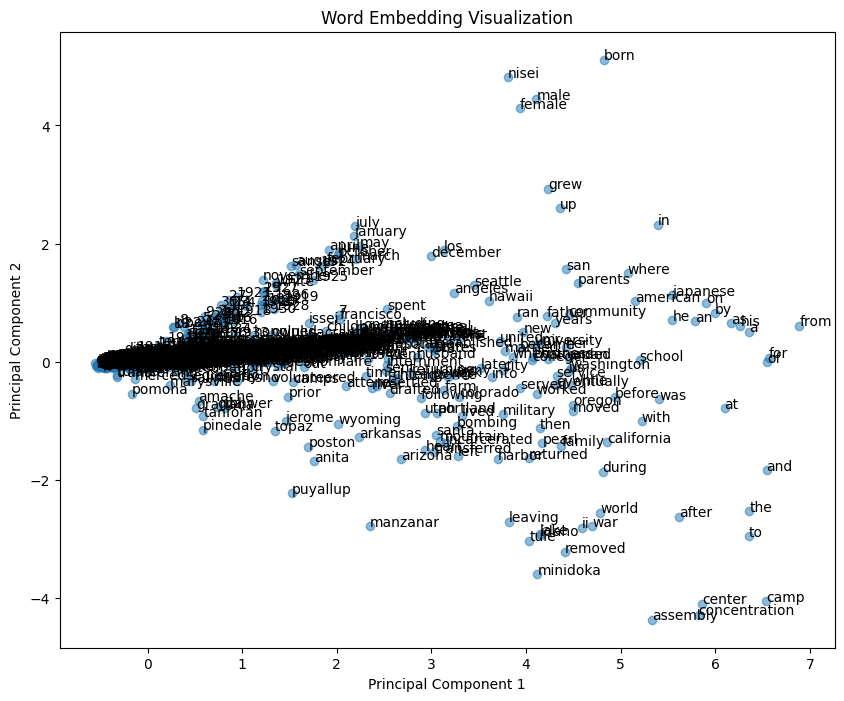

In [ ]:
from gensim.models import Word2Vec as WordEmbeddingModel
from sklearn.decomposition import PCA as DimensionalityReducer
import matplotlib.pyplot as VisualizationPlot

# Load the trained Word2Vec model
word_embedding_model = WordEmbeddingModel.load('word2vec_model.bin')

# Get the vocabulary and vectors
word_list = list(word_embedding_model.wv.index_to_key)
word_vectors = word_embedding_model.wv[word_list]

# Perform PCA to reduce dimensionality to 2
dimensionality_reducer = DimensionalityReducer(n_components=2)
reduced_result = dimensionality_reducer.fit_transform(word_vectors)

# Plot the words in 2D space
VisualizationPlot.figure(figsize=(10, 8))
VisualizationPlot.scatter(reduced_result[:, 0], reduced_result[:, 1], alpha=0.5)

# Annotate each point with its corresponding word
for index, word in enumerate(word_list):
    VisualizationPlot.annotate(word, xy=(reduced_result[index, 0], reduced_result[index, 1]))

VisualizationPlot.xlabel('Principal Component 1')
VisualizationPlot.ylabel('Principal Component 2')
VisualizationPlot.title('Word Embedding Visualization')
VisualizationPlot.show()



## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:

https://github.com/tanvi2419/files/blob/main/output_with_sentiment.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer

The assignment is very intresting and i almost enjoyed every part and question of it. Its very challenging for me to first understand the data i have used here which ofcourse i have created on my own in previouys assignment, it had descriptions of different people along with their details such as dates, address etc. Then to apply the mentioned tewchniques to get the results is very challenging as i told the dataset has mixed data. The parts i enjoyed is creating the code from scratch and especialy the last question where i craete model to find the embedings on my own, its great when i started visualising the results io have achieved. I believe the time provided is enogh as i have this zeel to learn very fast due to the time copnstraint so the time is ample.